# NARU - Laboratory #

Dependencies:

- `conda install -c anaconda bcolz ` : Loading token / vector dictionary
<br>

- `conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch` : Math 
    - or: `conda install pytorch torchvision torchaudio cpuonly -c pytorch -c=conda-forge`
<br> 


- `conda install -c conda-forge spacy` : Tokenization
<br>

- `conda install -c conda-forge matplotlib`
<br>

- `conda install -c anaconda seaborn ` : Plot styling

## Loading the dependencies ##

In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
%aimport utility.trainer
%aimport utility.ffnaru
%aimport utility.embedding
%aimport utility.data_loader 

Route loaded! Unit-Testing now...
Route Unit-Testing successful!
Group loaded! Unit-Testing now...
tensor([[-0.0732]])
tensor([[-0.0732]])
Bundle Unit-Testing successful!



In [3]:
import torch
from utility.embedding import Encoder
from utility.ffnaru import Network
from utility.data_loader import load_jokes
from utility.trainer import exec_trial_with_autograd
from utility.persistence import save_params, load_params
from utility.net_analysis import avg_sequence_length, load_and_plot
import time

Loading Data : Jokes

In [4]:
import random

def list_splitter(list_to_split, ratio):
    elements = len(list_to_split)
    middle = int(elements * ratio)
    return list_to_split[:middle], list_to_split[middle:]

jokes = load_jokes()
random.Random(42).shuffle(jokes)

print('First joke in the data-set:\n',jokes[0],'\n')

training_data, test_data = list_splitter(jokes, 0.8)

#training_data = jokes[:20]
#test_data = jokes[20:30]

print('Number of training samples: ',len(training_data))
print('Number of test samples: ', len(test_data))
print('Average sequence length: ', avg_sequence_length(jokes))

First joke in the data-set:
 ['I', 'just', 'read', 'this', 'article', 'about', 'short', 'term', 'memory', 'I', 'do', "n't", 'remember', 'what', 'it', 'was', 'about'] 

Number of training samples:  1297
Number of test samples:  325
Average sequence length:  18.14858199753391


## Training & Evaluation of Feed-Forward-NARU Model ##

In [8]:
# feed-forward-NARU
model = Network( # feed-forward-NARU
    depth=7,
    max_height=18,
    max_dim=128,
    max_cone=6,
    D_in=50,
    D_out=50,
    with_bias=False
)
target_folder = 'models/feed-forward-NARU'#+'_'+time.strftime("%Y%m%d-%H%M%S")+'/'
model.set_params(load_params(target_folder))
 
for W in model.get_params(): W.requires_grad = True

encoder = Encoder() # Token to vectors and vectors to tokens!

for i in range(1): # Outer loop for saving the model from time to time...
    choice_matrices = exec_trial_with_autograd(
        model=model,
        encoder=encoder,
        optimizer=torch.optim.Adam(model.get_params(), lr=0.0001),
        training_data=training_data,
        test_data=test_data,
        epochs=1,
        path=target_folder
    )
    #print(choice_matrices)
    # SAVING PARAMETERS:
    save_params( model, target_folder )


print('FFNN-NARU Training done!')

test_sentence = encoder.sequence_words_in('What did the bartender say to the jumper cables ?'.split())
pred_vecs = model.pred(test_sentence)
print(' '.join(encoder.sequence_vecs_in(pred_vecs)))


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'models/feed-forward-NARU'

## Analysis ##


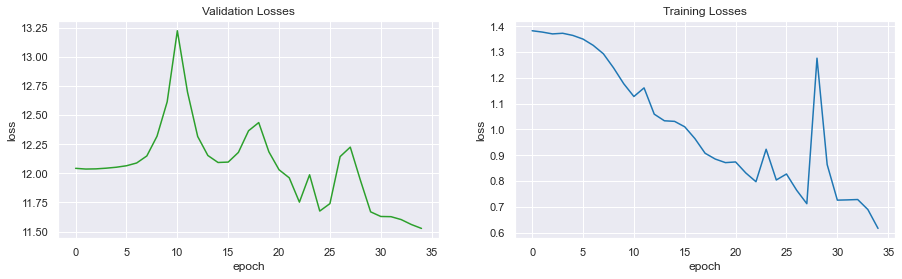

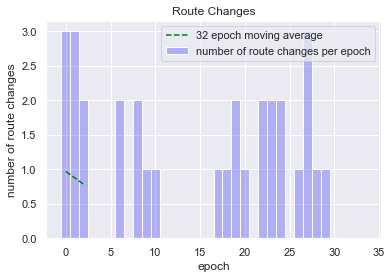

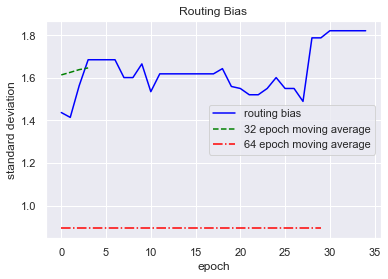

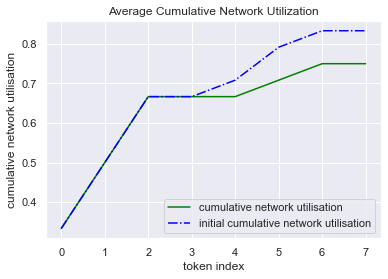

In [4]:

load_and_plot(data_path='models/data/', plot_path='models/plots/')

